## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = study_results.merge(mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(merged["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged.loc[merged.duplicated(subset=["Mouse ID", "Timepoint"])]
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = duplicate_mice["Mouse ID"]
print(duplicate_mice)

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged[merged["Mouse ID"].isin(duplicate_mice) ==False]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
#volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_volume = []
meadian_volume = []
var_volume = []
std_volume = []
sem_volume = []

mean_volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
# print(mean_volume)

median_volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
# print(median_volume)

var_volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
# print(var_volume)

std_volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
# print(std_volume)

sem_volume = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# print(sem_volume)

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stats1 = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                          "Median Tumor Volume": median_volume,
                          "Variance of Tumor Volume": var_volume,
                          "Standard Deviation of Tumor Volume": std_volume,
                          "Standard Error of the Tumor Volume": sem_volume
                          })
summ_stats1

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of the Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summ_stats2 = cleaned_data.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]}) 
summ_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Measurements for Each Drug Regimen')

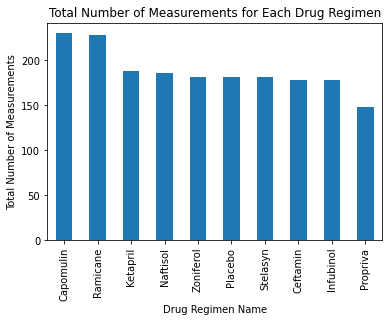

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = cleaned_data["Drug Regimen"].value_counts()
barchart = regimen_count.plot.bar(width=0.5)

barchart.set_xlabel("Drug Regimen Name")
barchart.set_ylabel("Total Number of Measurements")
barchart.set_title("Total Number of Measurements for Each Drug Regimen")

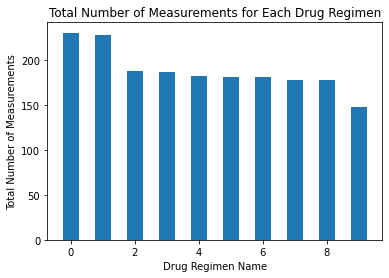

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_count = cleaned_data["Drug Regimen"].value_counts()

x_axis = np.arange(len(regimen_count))
plt.bar(x_axis, regimen_count, width=0.5)

plt.xlabel("Drug Regimen Name")
plt.ylabel("Total Number of Measurements")
plt.title("Total Number of Measurements for Each Drug Regimen")

plt.show()

Text(0, 0.5, '')

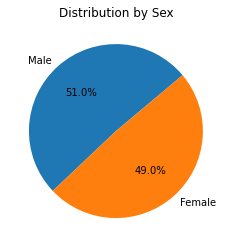

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = cleaned_data["Sex"].value_counts()
pieplot = sex_data.plot.pie(autopct="%1.1f%%", startangle=40, title="Distribution by Sex")
pieplot.set_ylabel('')

Text(0.5, 1.0, 'Distribution by Sex')

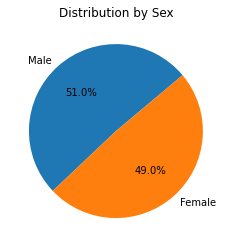

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = cleaned_data["Sex"].value_counts()

plt.pie(sex_data, autopct="%1.1f%%", startangle=40, labels=sex_data.index.values)
plt.title("Distribution by Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
four_druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_druglist:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    something = cleaned_data.loc[cleaned_data["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(something)
    quartiles = something.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = something.loc[(something < lower_bound) | (something > upper_bound)]
    outliers
    print(f"The Drug Regimen is {drug} and the lower quartiles is {lowerq}, upper quartile is {upperq}, iqr is {iqr}, lower bound is {lower_bound}, upper bound is {upper_bound}, and outliers are {outliers}")
    

The Drug Regimen is Capomulin and the lower quartiles is 37.685932865, upper quartile is 45.0, iqr is 7.314067135000002, lower bound is 26.714832162499995, upper bound is 55.9711007025, and outliers are 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
The Drug Regimen is Ramicane and the lower quartiles is 36.67463458499999, upper quartile is 45.0, iqr is 8.325365415000007, lower bound is 24.18658646249998, upper bound is 57.48804812250001, and outliers are 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
The Drug Regimen is Infubinol and the lower quartiles is 47.3123533, upper quartile is 57.314443967500004, iqr is 10.002090667500006, lower bound is 32.309217298749985, upper bound is 72.31757996875001, and outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
The Drug Regimen is Ceftamin and the lower quartiles is 47.208427112500004, upper quartile is 56.801437570000004, iqr is 9.5930104575, lower bound is 32.818911426250004, upper bo

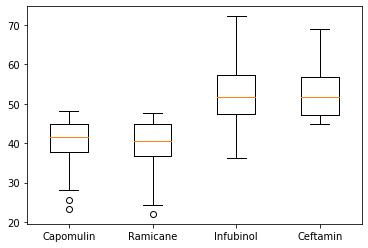

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels=four_druglist)
plt.show()

## Line and Scatter Plots

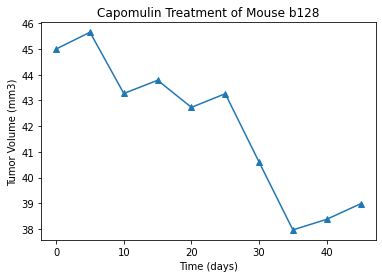

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mousecap = cleaned_data.loc[cleaned_data["Mouse ID"] == "b128"]

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mousecap["Timepoint"], mousecap["Tumor Volume (mm3)"], marker = "^")

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

# Display plot
plt.show()

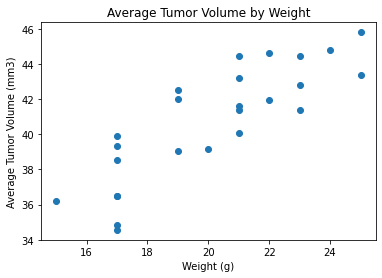

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin= cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]


avg_tumorvol = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "average_tumor_vol"})

avg_tumorvol = pd.merge(capomulin, avg_tumorvol, on="Mouse ID")
final_avg_tumorvol = avg_tumorvol[["Weight (g)", "average_tumor_vol"]].drop_duplicates()
final_avg_tumorvol

x = final_avg_tumorvol["Weight (g)"]
y = final_avg_tumorvol["average_tumor_vol"]

plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

plt.show()


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
